$$u_x + u_t = 0 \newline а) Схема \space с \space разностями \space против \space потока \space\space\space \frac{y_m^{n+1} - y_m^n}{\tau} + \frac{y_m^n-y_{m-1}^n}{h} = 0 \newline б) Схему \space Лакса-Вендроффа \space\space\space \frac{y_m^n+1 - y_m^n}{\tau} + a\frac{y_{m+1}^n - y_{m-1}^n}{2h} - \frac{a^2\tau}{2} \frac{y_{m+1}^n - 2y_m^n + y_{m-1}^n}{h^2} = 0  $$

In [158]:
import math
import numpy as np
import matplotlib.pyplot as plt

$0 \leq x \leq 20$  
$T=18$

In [159]:
class Grid():

    def __init__(self, CFL):
        self.L = 20
        self.T = 18
        self.h = 0.5
        self.CFL = CFL
        self.tau = self.h * CFL
        self.xr = np.arange(0, self.L + (self.h/2), self.h)
        self.tr = np.arange(0, self.T + (self.tau/2), self.tau)
        self.N = len(self.tr)
        self.M = len(self.xr)

$CFL = [0.6, 1, 1.01]$

In [160]:
grids = [Grid(0.6), Grid(1), Grid(1.01)]

Функция для вывода результатов в моменты времени    $T = [0, 5, 10, 15, 18]$

In [161]:
def plot(grid, u):
    fig, axs = plt.subplots(5)
    for i, t in enumerate([0, 5, 10, 15, 18]):
        axs[i].plot(grid.xr, u[int(t/grid.tau)])
        axs[i].set_title(f't={t}')
        axs[i].grid()
        axs[i].set_xlim(0, grid.L)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
    axs[0].set_title(f'CFL={grid.CFL}\n t=0')
    fig.set_figheight(15)
    fig.set_figwidth(10)
    plt.subplots_adjust(hspace=0.6)

In [162]:
#начальное условие
def u0(grid, x):
    return math.sin(4*math.pi*x/grid.L)

Граничные условия: $y_{0}^{n+1}=y_{N-1}^{n+1}$

In [163]:
#Уголок
def corner(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        for j in range(1, grid.M):
            u[i+1][j] = u[i][j]-(grid.tau/grid.h)*(u[i][j]-u[i][j-1])
        u[i+1][0] = u[i+1][grid.M-1]
    return u

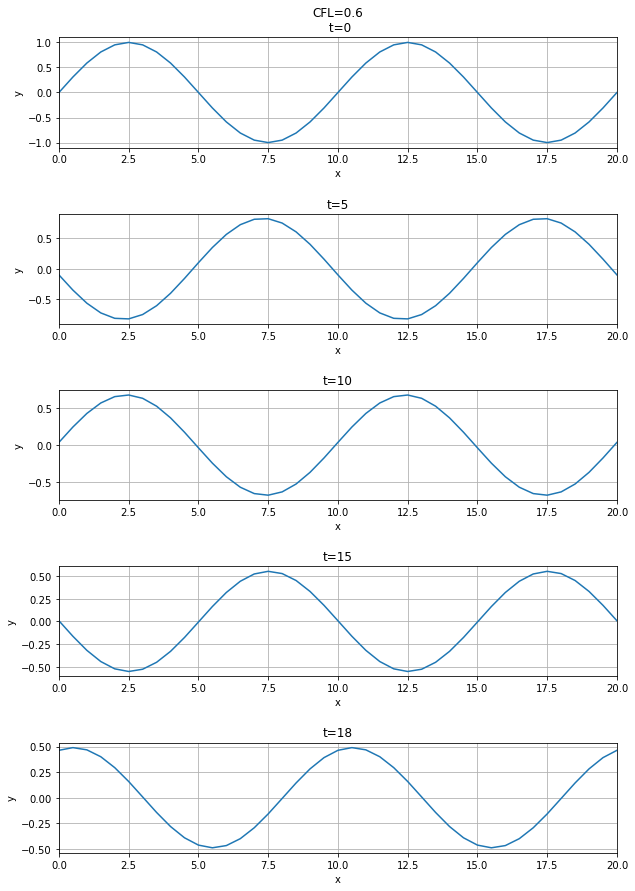

In [164]:
plot(grids[0], corner(grids[0]))

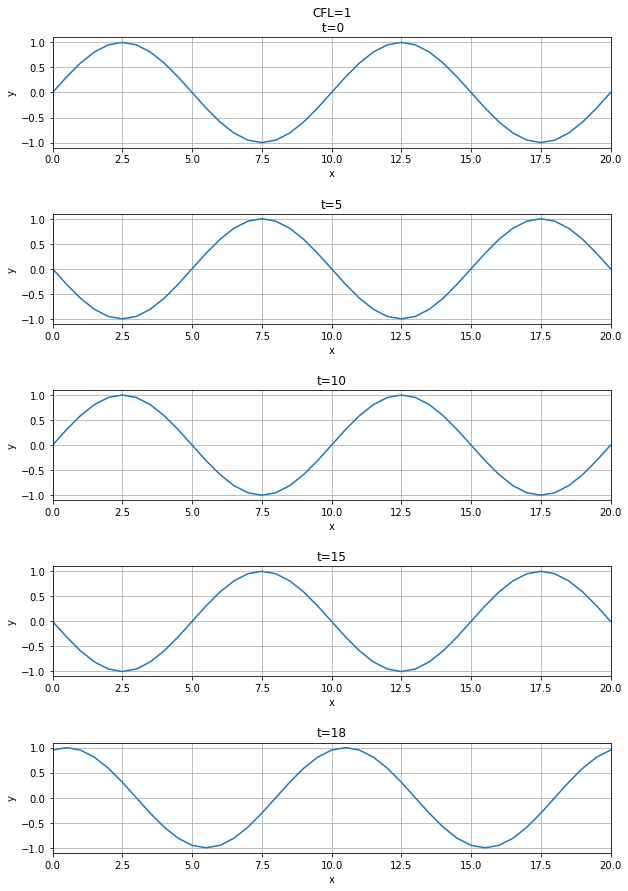

In [165]:
plot(grids[1], corner(grids[1]))

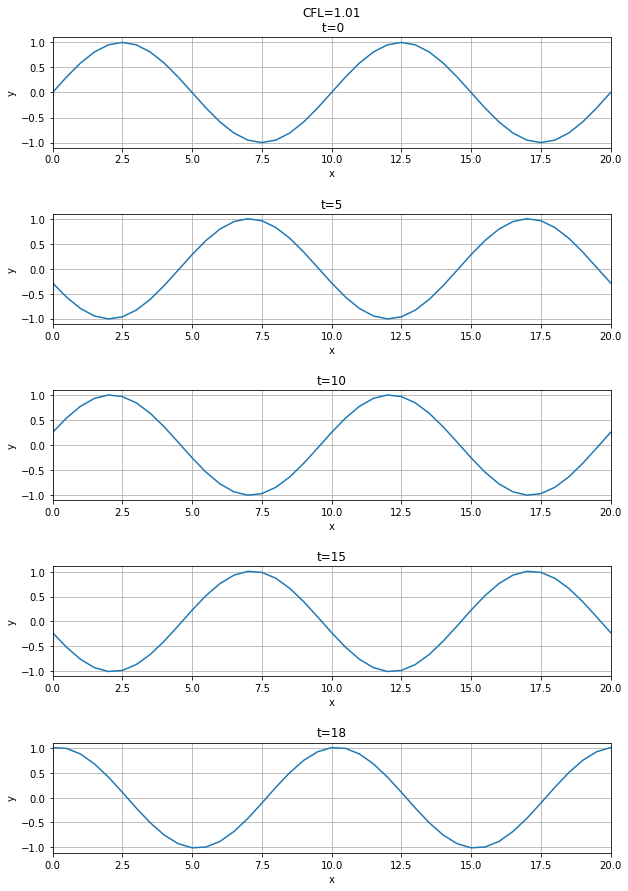

In [166]:
plot(grids[2], corner(grids[2]))

In [167]:
a = 1
def f(grid, prev, curr, next): 
    return curr - grid.tau*( (a *(next-prev) / (2*grid.h)) - ( ((a**2) * grid.tau / 2) * (next - (2*curr) + prev)/(grid.h**2) ) )

In [168]:
def lax(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        u[i+1][grid.M-1] = f(grid, u[i][grid.M-2], u[i][grid.M-1], u[i][1]) 
        for j in range(1, grid.M-1):
            u[i+1][j] = f(grid, u[i][j-1], u[i][j], u[i][j+1])
        u[i+1][0] =  u[i+1][grid.M-1]
        
    return u

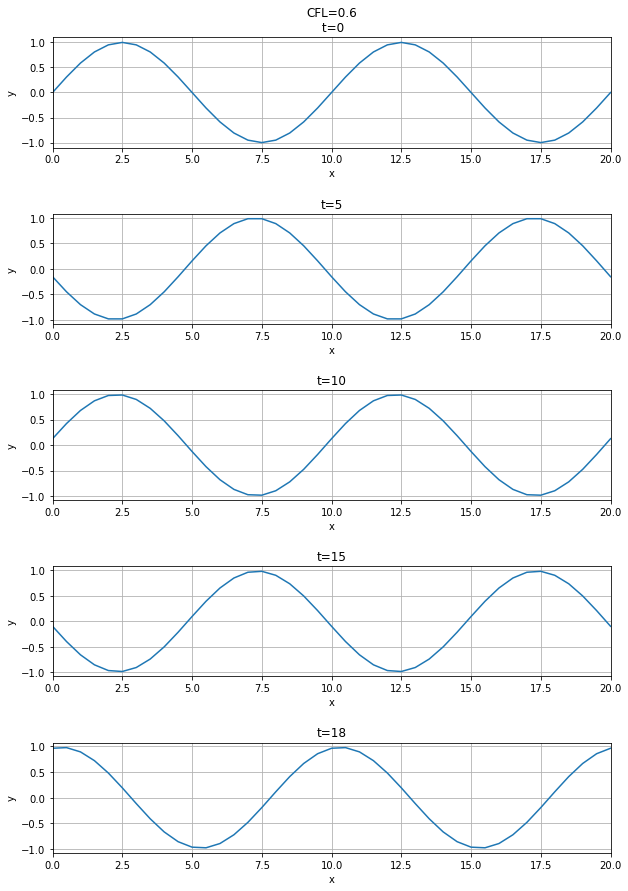

In [169]:
plot(grids[0], lax(grids[0]))

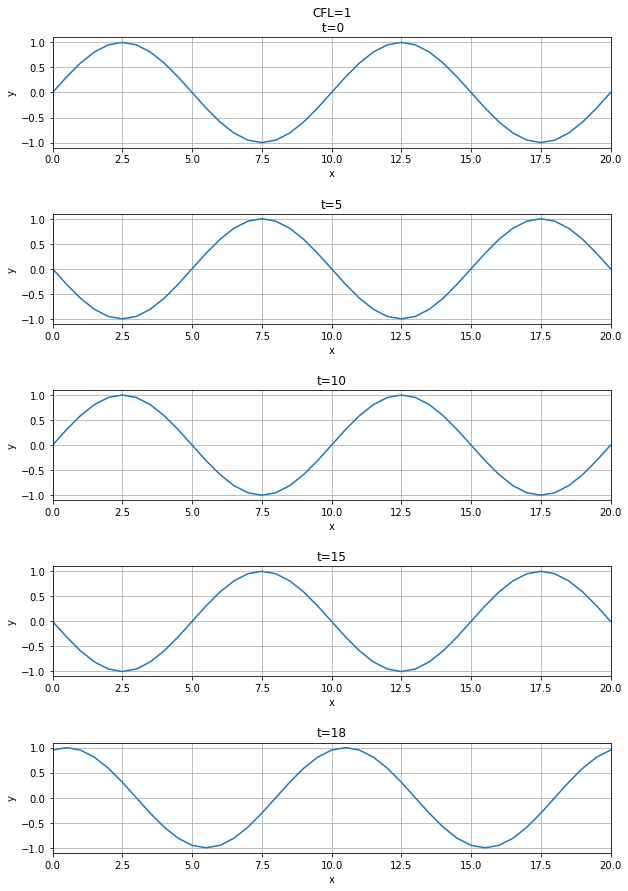

In [170]:
plot(grids[1], lax(grids[1]))


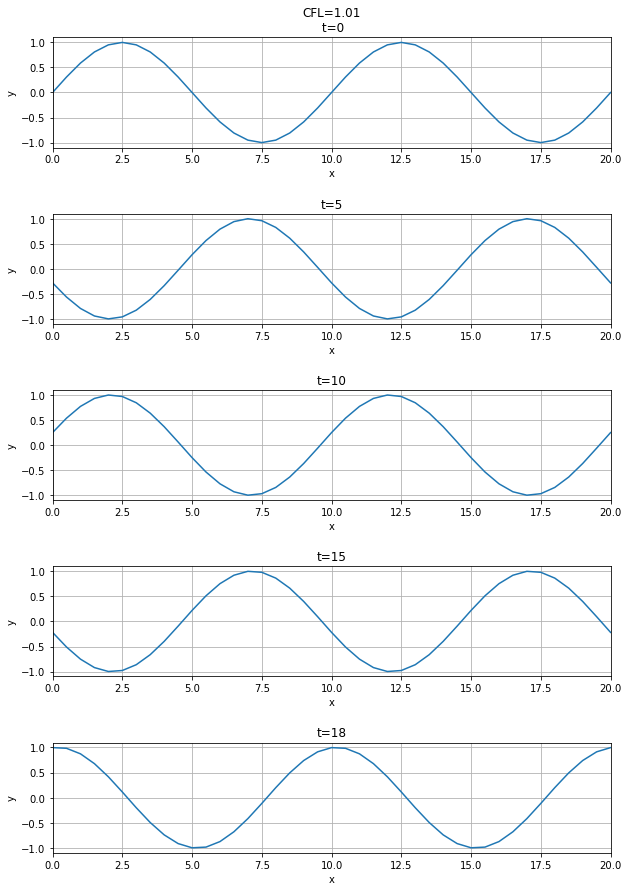

In [171]:
plot(grids[2], lax(grids[2]))


Метод устойчив при $|CFL|\leq1$